# Suicide Around The World

According to [Wikipedia](https://en.wikipedia.org/wiki/Suicide), suicide is the act of intentionally causing one's own death. Suicide rates can be a good measure of the mental health in the society, since the act of suicide is highly related to mental disorders. The following report uses the data made available by [kaggle](https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016?page=2) and aims to answer the following questions:

* The number of suicide cases is increasing over time?
* Is suicide related to the individual's sex?
* Is there a certain age where suicide is more susceptible?
* Do socioeconomical and geographical factors affects the suicide rates?

## Setting up the data

We start our analysis loading and getting some general information about the data.

In [102]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas.api.types import CategoricalDtype
import matplotlib.ticker as mtick
from matplotlib.gridspec import GridSpec

df = pd.read_csv('data.csv')

df

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


Our dataset has 27820 rows and 12 columns. The dataset contains information about the total number of suicide cases (suicides_no) and the suicide rate over 100 thousand habitants (suicides/100k pop) grouped by country, year, sex, age and generation. The dataset also brings information about the gross domestic product (gdp_for_year) and gross domestic product per capita (gdp_per_capita), both in US dollars, grouped by year and country.

Some columns may have null data, as it has been seen in the HDI for year column. Let us check the dataset to see which column has null data.

In [103]:
columns = df.columns
nulls = [df[i].isna().sum() for i in df.columns]

df_nulls = pd.DataFrame(data={'column':columns, 'nulls':nulls})

df_nulls

,column,nulls
0,country,0
1,year,0
2,sex,0
3,age,0
4,suicides_no,0
5,population,0
6,suicides/100k pop,0
7,country-year,0
8,HDI for year,19456
9,gdp_for_year ($),0


The HDI for year columns is the only one with null values and for that reason it will not be used in this report.

In [104]:
df.drop('HDI for year', axis=1, inplace=True)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,156,624,900",796,Boomers


Let us check the types of the remaining columns.

In [105]:
df.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

The gdp variables have names that may cause troubles in the analysis. Also, the gdp for year variable must be treated as an integer number. Let us correct these issues.

In [106]:
df.rename(columns={' gdp_for_year ($) ':'gdp_for_year', 'gdp_per_capita ($)': 'gdp_per_capita'}, inplace=True)
df['gdp_for_year'] = df['gdp_for_year'].str.replace(',','')
df['gdp_for_year'] = df['gdp_for_year'].astype('int64')
df.tail()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year,gdp_per_capita,generation
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,63067077179,2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,63067077179,2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,63067077179,2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,63067077179,2309,Generation Z
27819,Uzbekistan,2014,female,55-74 years,21,1438935,1.46,Uzbekistan2014,63067077179,2309,Boomers


In order to compare correctly the suicide rates over time, it is necessary to have the same countries in all years. Let us check it that is true.

In [107]:
df_countries_by_year = df.groupby(['year']).agg(countries=('country', pd.Series.nunique)).reset_index()

df_countries_by_year

,year,countries
0,1985,48
1,1986,48
2,1987,54
3,1988,49
4,1989,52
5,1990,64
6,1991,64
7,1992,65
8,1993,65
9,1994,68


Most of the years do not include data for the same countries. To make possible the comparison of suicide rates over time, we are going to be using only the countries which are included in all of the years. The year of 2016 will be ignored since there are only a few countries included in this year.

In [108]:
df = df[df['year'] != 2016]
df_years_by_countries = df.groupby('country')['year'].nunique().reset_index()
country_filter=df_years_by_countries.query('year==31')['country'].to_list()

print('Number of chosen countries:', len(country_filter))

Number of chosen countries: 23


We now have 23 countries that can be compared over time. The countries are listed below.

In [109]:
df = df[df['country'].isin(country_filter)]
for i in country_filter:
    print(i)
    

Argentina
Austria
Belgium
Brazil
Chile
Colombia
Ecuador
Greece
Iceland
Israel
Italy
Japan
Luxembourg
Malta
Mauritius
Mexico
Netherlands
Puerto Rico
Republic of Korea
Singapore
Spain
United Kingdom
United States


## Suicide over time

Let us start our analysis by plotting the total number of population and suicide cases for the countries and the period selected.

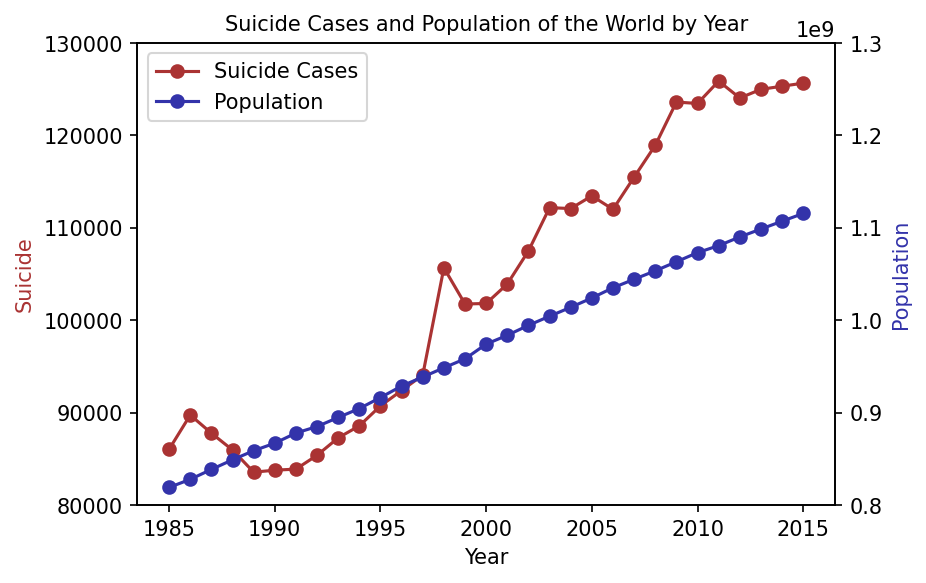

In [110]:
df_suicide_by_year = df.groupby('year')['suicides_no'].sum()
df_population_by_year = df.groupby('year')['population'].sum()

fig, ax = plt.subplots(figsize=(6,4), dpi=150)
ax.set_title('Suicide Cases and Population of the World by Year', fontdict={'fontsize':10})

l1,=ax.plot(df_suicide_by_year.index, df_suicide_by_year, label='Suicide Number', marker='o',color='#AA3333')
ax2 = ax.twinx()
l2,=ax2.plot(df_population_by_year.index, df_population_by_year, label='Population', marker='o', color='#3333AA')
plt.legend([l1,l2],['Suicide Cases','Population'], loc='upper left')
ax.set_xlabel('Year')
ax.set_ylabel('Suicide', color='#AA3333')
ax.set_yticks([i for i in range(80000, 140000, 10000)])
ax2.set_ylabel('Population', color='#3333AA')
ax2.set_yticks([i for i in range(800_000_000, 1_400_000_000, 100_000_000)])
plt.show()

Although there were a small period in the late 80's and early 90's where the number of suicide cases did not increase, in general, it has growm faster than the population. Let us see the total growth for both from 1985 to 2015.  

In [111]:
suicide_cases_1985 = df.query("""year==1985""")['suicides_no'].sum()
suicide_cases_2015 = df.query("""year==2015""")['suicides_no'].sum()
population_1985 = df.query("""year==1985""")['population'].sum()
population_2015 = df.query("""year==2015""")['population'].sum()
suicide_growth = (suicide_cases_2015-suicide_cases_1985)/suicide_cases_1985
population_growth = (population_2015-population_1985)/population_1985
print("Suicide cases growth:", suicide_growth)
print("Population growth:", population_growth)

Suicide cases growth: 0.4605076590502313
Population growth: 0.36196653712939025


The population has grown about 36%, going from 800 million to a little over tha 1.1 billion people. The number of suicide cases grew 46% in the same period, going from a little over 85 thousand to almost 130 thousand. The population growth seems to be constant whereas the number of suicide cases growth is apparently random. Let us see both growthes by year.

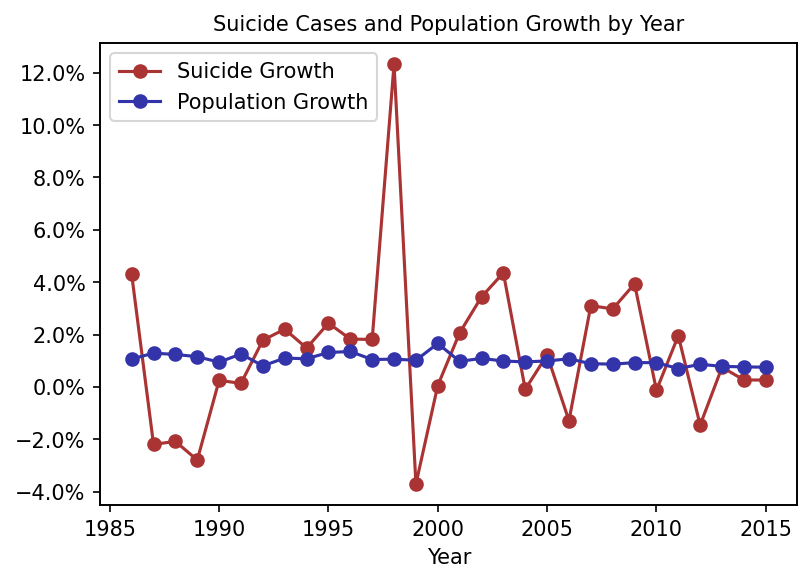

In [112]:

df_growth = df.groupby(['year'])[['suicides_no', 'population']].sum().pct_change()*100


fig, ax = plt.subplots(figsize=(6,4), dpi=150)
ax.set_title('Suicide Cases and Population Growth by Year', fontdict={'fontsize':10})

l1,=ax.plot(df_growth.index, df_growth['suicides_no'], label='Suicide Cases', marker='o',color='#AA3333')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax2 = ax.twiny()
l2,=ax2.plot(df_growth.index, df_growth['population'], label='Population', marker='o', color='#3333AA')
plt.legend([l1,l2],['Suicide Growth','Population Growth'], loc='upper left')
ax.set_xlabel('Year')
ax2.get_xaxis().set_visible(False)
plt.show()

As expected, the population growth is almost constant, close to 1% per year, whereas the suicide cases growth is non-linear, although it is usually between -4% and 4%. In the late 90's there was a huge increase in the suicide growth. Let us see more in depth that specific period.

In [113]:
year_max_suicide_growth = df_growth['suicides_no'].idxmax()
period_max_suicide_growth = [year_max_suicide_growth, year_max_suicide_growth-1]
print("Year of maximum growth in number of suicide cases:", year_max_suicide_growth)

df_countries_year_max = df[df['year'].isin(period_max_suicide_growth)].groupby(['country', 'year'])['suicides_no'].sum()\
                                        .reset_index()

df_countries_year_max = df_countries_year_max.groupby(['country']).agg(growth=('suicides_no', lambda x: x.iloc[1]-x.iloc[0]),\
                                  growth_in_percent=('suicides_no', lambda x: 100*(x.iloc[1]-x.iloc[0])/x.iloc[0])).\
                        sort_values(['growth_in_percent'], ascending=False).reset_index()
df_countries_year_max.query("growth_in_percent > 12")

Year of maximum growth in number of suicide cases: 1998


,country,growth,growth_in_percent
0,Colombia,810,65.217391
1,Republic of Korea,2545,42.247676
2,Japan,8178,35.128866
3,Mauritius,33,27.049180
4,Puerto Rico,48,17.582418
5,Chile,121,13.296703


In the year of 1998, there was an increase of over 12% in the number of suicide cases, but only 6 countries presented such a high increase. More than that, Japan and the Republic of Korea alone are responsible for an increase of more than 10000 cases. This may be related to an [economic crisis](https://www.sciencedirect.com/science/article/abs/pii/S0277953609000100) faced by some easter Asia countries in that period.

## Suicide Cases By Sex

In this part of our analysis, we intend to see if suicide is related to sex. Let us start by seeing the proportion of population and suicide cases by sex. 

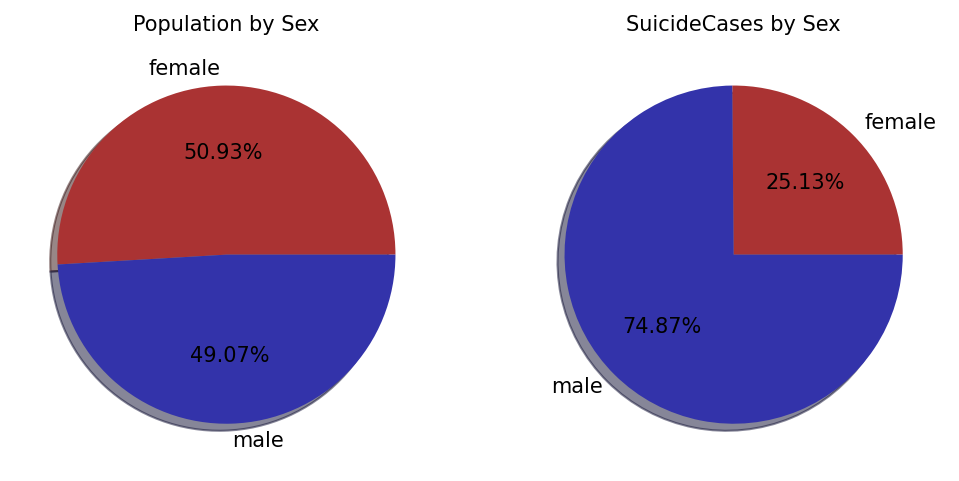

In [114]:
df_suicide_by_sex = df.groupby(['sex'])['suicides_no'].sum()
df_population_by_sex = df.groupby(['sex'])['population'].sum()

fig, ax = plt.subplots(1,2,figsize=(8,4), dpi=150)

ax[0].set_title('Population by Sex', fontdict={'fontsize':10})
ax[1].set_title('SuicideCases by Sex', fontdict={'fontsize':10})
ax[0].pie(df_population_by_sex, labels=df_population_by_sex.index, autopct='%0.2f%%', shadow=True, colors=['#AA3333', '#3333AA'])
ax[1].pie(df_suicide_by_sex, labels=df_suicide_by_sex.index, autopct='%0.2f%%', shadow=True, colors=['#AA3333', '#3333AA'])
plt.show()

Even though the male population is slightly smaller, the number of suicide cases is almost 3 times larger for males than for females. This is a very known fact and the [reasons](https://www.priorygroup.com/blog/why-are-suicides-so-high-amongst-men) cannot be summed up, but may include lack of communication, financial pressure and substance abuse. 

With such a high incidence along males, it is expected to be rather a global phenomenon than a local one. Let us see the percentage of male's suicide cases in a country level.

In [115]:
df_country_male_suicides= df.groupby(['country', 'sex'])['suicides_no'].sum().reset_index()
df_country_male_suicides['suicides_%'] = df_country_male_suicides['suicides_no'] / df_country_male_suicides\
                                            .groupby(['country'])['suicides_no'].transform('sum')
df_country_male_suicides.query("""sex=='male'""").sort_values(['suicides_%'])

,country,sex,suicides_no,suicides_%
39,Singapore,male,6296,0.624046
33,Netherlands,male,32674,0.667538
37,Republic of Korea,male,179115,0.684350
23,Japan,male,555272,0.688153
13,Ecuador,male,14422,0.698064
5,Belgium,male,44749,0.713006
25,Luxembourg,male,1416,0.723187
3,Austria,male,35972,0.736045
29,Mauritius,male,2816,0.741834
21,Italy,male,99179,0.751015


As expected, the suicide incidence is much higher for men all around the world, with Singapore having the smallest proportion, a little over 60%, and Puerto Rico having the largest one, almost 90%.

## Suicide Cases By Age

In this part of our analysis, we intend to see if suicide is related to age. Let us start by seeing the number of cases by age group.

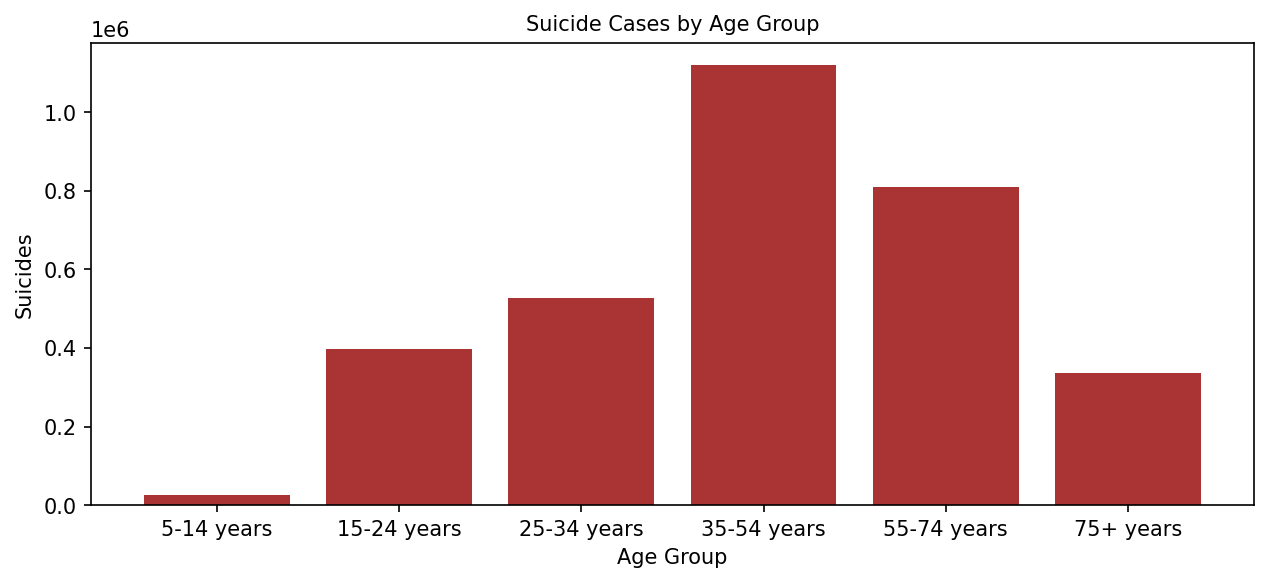

In [116]:
age_order = CategoricalDtype(
    ['5-14 years', '15-24 years', '25-34 years', '35-54 years','55-74 years', '75+ years'], 
    ordered=True
)

df['age'] = df['age'].astype(age_order)
df_suicide_by_age = df.groupby('age')['suicides_no'].sum()
plt.figure(figsize=(10,4), dpi=150)
plt.title('Suicide Cases by Age Group', fontdict={'fontsize':10})
plt.bar(df_suicide_by_age.index, df_suicide_by_age, color=['#AA3333'])
plt.ylabel('Suicides')
plt.xlabel('Age Group')
plt.show()

We can see that the number of cases is much higher for adults, having a peak in the 35-54 years group age. This is a strong indicator that financial pressure may be one of the main causes for suicide, as pointed above. Even though the 75+ years group age has the second smallest incidence in absolute numbers, it might be very larger for its population. Let us compare the suicide rate by 100 thounsand people.

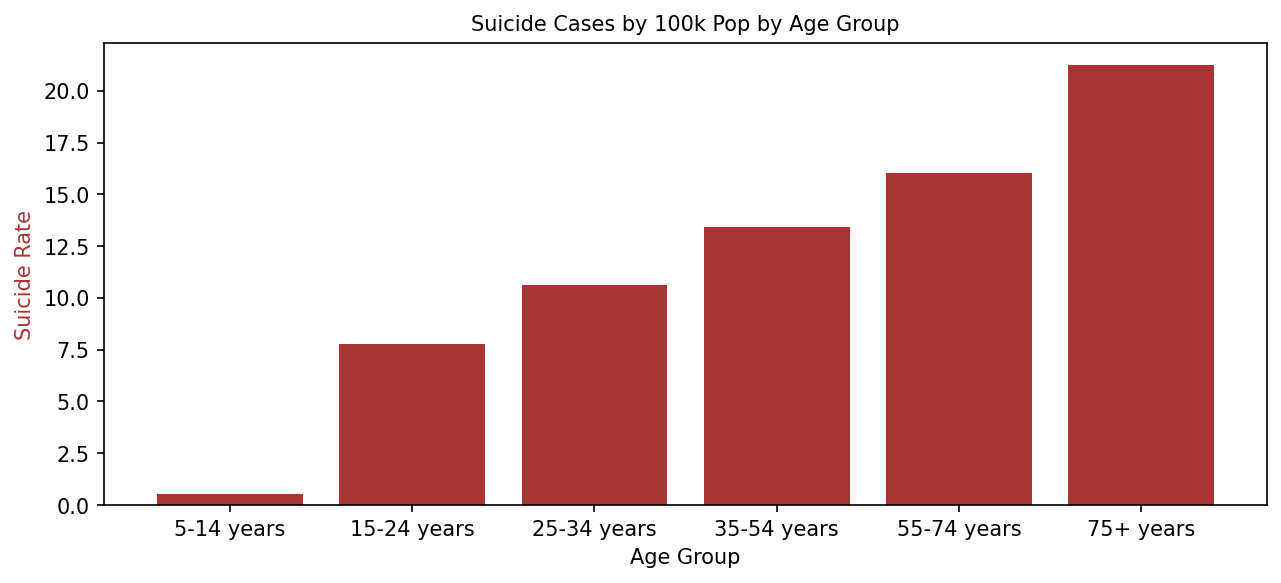

In [117]:
df_suicide100k_by_age = df.groupby('age')['suicides_no'].sum()*100_000 / df.groupby('age')['population'].sum()

fig, ax=plt.subplots(figsize=(10,4), dpi=150)
ax.set_title('Suicide Cases by 100k Pop by Age Group', fontdict={'fontsize':10})
ax.bar(df_suicide100k_by_age.index, df_suicide100k_by_age, color=['#AA3333'])
ax.set_ylabel('Suicide Rate', color='#AA3333')
ax.set_xlabel('Age Group')
plt.show()

This graph shows that as people get older, suicide becomes more likely and the rate increases for the elderly, with the 75+ years age group having a rate of more than 20 cases per 100 thousand individuals. It is well known that the elderly are the fastest increasing age group of the population. To visualize that, let us compare the world population by age group between the years of 1985 and 2015. 

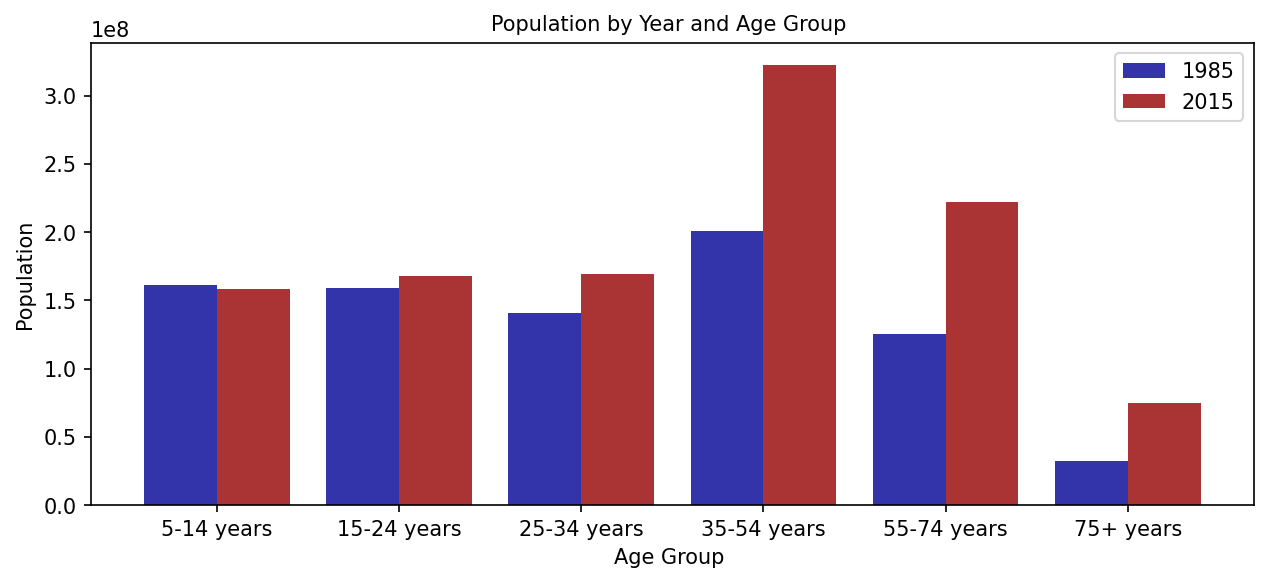

In [118]:
df_population_by_age_1985 = df.query("""year==1985""").groupby(['age'])['population'].sum()
df_population_by_age_2015 = df.query("""year==2015""").groupby(['age'])['population'].sum()
fig, ax=plt.subplots(figsize=(10,4), dpi=150)
x_axis = np.arange(len(df_population_by_age_1985.index))
ax.set_title('Population by Year and Age Group ', fontdict={'fontsize':10})
ax.bar(x_axis-0.2, df_population_by_age_1985, width=0.4, label = '1985',color=['#3333AA'])
ax.bar(x_axis+0.2, df_population_by_age_2015,width=0.4, label = '2015', color=['#AA3333'])
ax.set_xticks(x_axis, df_population_by_age_1985.index)
ax.set_ylabel('Population')
ax.set_xlabel('Age Group ')
ax.legend()
plt.show()

The graph shows that the elderly population is rapidly growing, especially de 75+ years group, which has been more than doubled in 30 years. This fact associated with the stagnation in the young population tends to impact even more the suicide rates in the future and it is likely to become a global public health problem.

## Socioeconomical and Geographical Factors


In this part of our analysis, we intend to see how socioeconomical and geographical factors may affect the suicide rates. Let us see the global gdp and the number of suicides cases by year.

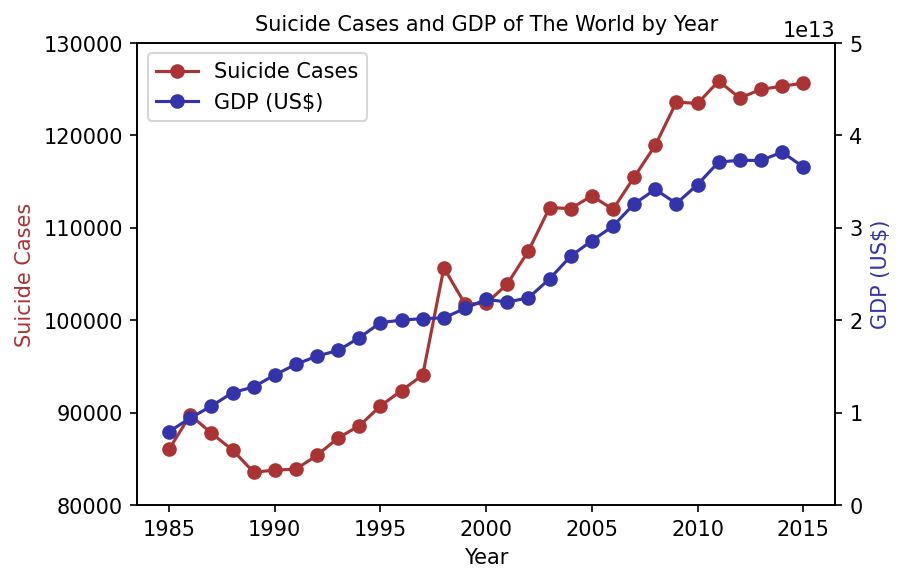

In [119]:
df_gdp_by_year = df.groupby(['year', 'country'])['gdp_for_year'].max().reset_index()
df_gdp_by_year = df_gdp_by_year.groupby(['year'])['gdp_for_year'].sum()

fig, ax = plt.subplots(figsize=(6,4), dpi=150)

ax.set_title('Suicide Cases and GDP of The World by Year', fontdict={'fontsize':10})
l1,=ax.plot(df_suicide_by_year.index, df_suicide_by_year, label='Suicide Cases', marker='o', color='#AA3333')

ax2 = ax.twinx()
l2,=ax2.plot(df_gdp_by_year.index, df_gdp_by_year, label="GDP (US$)", marker='o', color='#3333AA')
plt.legend([l1, l2],['Suicide Cases','GDP (US$)'], loc='upper left')


ax.set_xlabel('Year')
ax.set_ylabel('Suicide Cases', color='#AA3333')
ax.set_yticks([i for i in range(80000, 140000, 10000)])
ax2.set_ylabel('GDP (US$)', color='#3333AA')
ax2.set_yticks([i for i in range(0, 60_000_000_000_000, 10_000_000_000_000)])
plt.show()

Even though there seems to be a correlation between periods of economical stagnation and increment in the suicide cases, it is hard to determine that, since they are both highly related to the population size. In order to avoid this issue, let us compare the gdp per capita with the suicide rate by 100 thounsand individuals. 

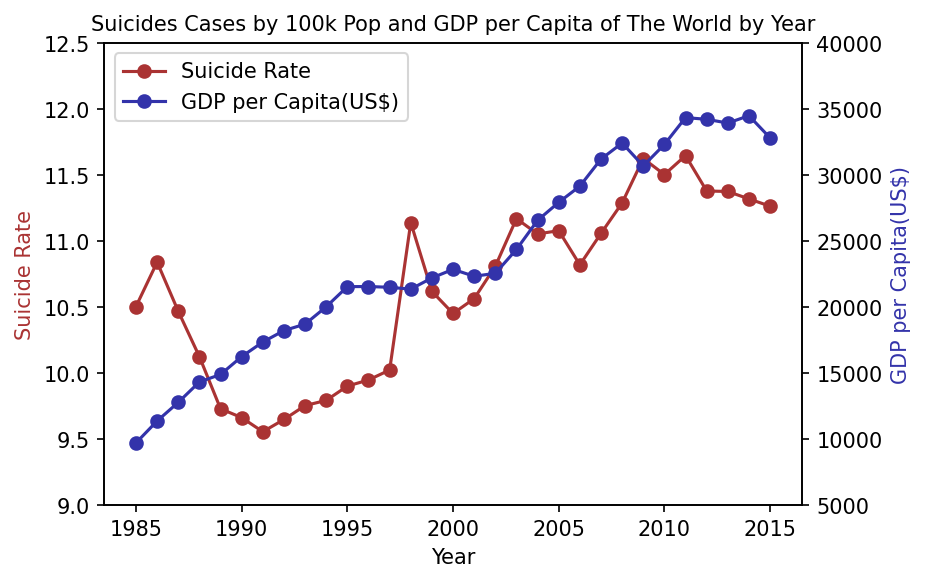

In [120]:
df_gdp_per_capita_by_year = df_gdp_by_year / df_population_by_year
df_suicide100k_by_year = df_suicide_by_year * 100_000 / df_population_by_year

fig, ax = plt.subplots(figsize=(6,4), dpi=150)

ax.set_title('Suicides Cases by 100k Pop and GDP per Capita of The World by Year', fontdict={'fontsize':10})
l1,=ax.plot(df_suicide100k_by_year.index, df_suicide100k_by_year, label='Suicide Cases', marker='o', color='#AA3333')

ax2 = ax.twinx()
l2,=ax2.plot(df_gdp_per_capita_by_year.index, df_gdp_per_capita_by_year, label="GDP (US$)", marker='o', color='#3333AA')
plt.legend([l1, l2],['Suicide Rate','GDP per Capita(US$)'], loc='upper left')


ax.set_xlabel('Year')
ax.set_ylabel('Suicide Rate', color='#AA3333')
ax.set_yticks([i for i in np.arange(9, 13, 0.5)])
ax2.set_ylabel('GDP per Capita(US$)', color='#3333AA')
ax2.set_yticks([i for i in range(5000, 45000, 5000)])
plt.show()

Even though there seems to have a more clear relation between the periods of economical stagnation and the peaks in the suicide rate, it is not strong enough to determine that. One of the reasons for this behavior can be the fact that each country may have their own particular economic cycles, independently of what may be hapenning in the majority of the world. Let us see how the suicide rates changed in this 30 years period comparing the ranks of the countries. 

In [121]:
df_suicide100k_country_year = df.groupby(['year', 'country'])[['suicides_no', 'population']].sum()
df_suicide100k_country_year['suicide_rate'] = df_suicide100k_country_year['suicides_no']*100_000/\
                                                df_suicide100k_country_year['population']

df_suicide100k_country_year_1985 = df_suicide100k_country_year.loc[1985].reset_index()
df_suicide100k_country_rank_1985['rank'] = df_suicide100k_country_rank_1985['suicide_rate'].rank(ascending=False)\
                                            .astype('int')

df_suicide100k_country_year_2015 = df_suicide100k_country_year.loc[2015].reset_index()
df_suicide100k_country_rank_2015['rank'] = df_suicide100k_country_rank_2015['suicide_rate'].rank(ascending=False)\
                                            .astype('int')

df_suicide100k_country_rank = df_suicide100k_country_rank_1985.merge(df_suicide100k_country_rank_2015, on='country',
                                                                    suffixes=['_1985', '_2015'])
df_suicide100k_country_rank['suicide_rate_diff'] = df_suicide100k_country_rank_2015['suicide_rate']-\
                                                    df_suicide100k_country_rank_1985['suicide_rate']
df_suicide100k_country_rank.sort_values('rank_2015')

,country,suicides_no_1985,population_1985,suicide_rate_1985,rank_1985,suicides_no_2015,population_2015,suicide_rate_2015,rank_2015,suicide_rate_diff
18,Republic of Korea,3689,36716700,10.047199,10,13510,48671752,27.757374,1,17.710174
11,Japan,23257,112809200,20.616226,3,23092,120376310,19.183176,2,-1.433050
2,Belgium,2281,9269600,24.607319,2,1867,10624356,17.572830,3,-7.034489
1,Austria,2091,7110115,29.408807,1,1251,8219386,15.220115,4,-14.188692
22,United States,29446,220723000,13.340703,7,44189,300078511,14.725813,5,1.385110
8,Iceland,32,220100,14.538846,5,40,308554,12.963695,6,-1.575151
12,Luxembourg,55,344800,15.951276,4,64,537748,11.901485,7,-4.049791
16,Netherlands,1638,13618300,12.027933,8,1873,16057342,11.664446,8,-0.363487
4,Chile,683,10675400,6.397887,16,1838,16565725,11.095198,9,4.697311
14,Mauritius,104,883400,11.772696,9,104,1154848,9.005514,10,-2.767182


The country with the most worrying situation is by far the Republic of Korea. It has climbed 9 positions in the ranking, being the currently number one, with the suicide rate almost 50% larger than the second placed country. Its rate has grown by almost 200% in 30 years.

It is interesting to note that 3 of the top 5 ranked countries in 2015 were also in the top 5 ranked countries in 1985. A similar behavior can be seen in 4 of the bottom 5 ranked countries in 2015. This indicates that suicide is more culturally presented in some countries than in others. One could argue that it seems to have a climate factor in the suicide rate, since most of the low ranked countries have warmer temperatures and the high ranked ones have colder temperatures. However, we lack of enough data to claim such a thing. It is also interesting to note that Japan, Belgium and Austria have dropped their rates, especially the latter with a decrease of almost 50%, whereas Brazil, Mexico, Colombia and Greece have increased their ratings. This can be maybe explained by a bigger presence of public health campaigns in countries with higher rates.

## Conclusion

In this project we have analised suicide cases data for 23 countries in a 30 year period (1985-2015). In this period, the number of cases has grown by 46%, whereas the population has grown by 36%. While the population growth is very linear, close to 1% per year, the suicide cases growth has a rather chaotic behavior, varying from approximately -4% to 4% per year, although there were a peak in the year of 1998 of 12%, boosted mainly by easter Asia countries (Japan and Republic of Korea) having a growth larger than 35% in the same year.

It was also shown that suicide is highly related to sex, with men representing 75% of the total number of cases. Men do tend to commit suicide more than women in all countries analised, with the smallest portion of cases seen in Singapore (close to 62%) and the largest seen in Puerto Rico (close to 88%). Suicide is also related to age and as people get older, it becomes a more likely risk, with the 75+ age group having a suicide rate by 100 thousand individuals of more than 20 cases.

We have also seen that there may be cultural factor in suicide, since the top and bottom ranked countries tend to be the same over the years. Although it still has a high suicide rate, Austria has cut it by almost 50%, going from a little more than 29 cases by 100 thounsand individuals in 1985 to 15 cases in 2015, being the currently number 4 in the ranking. On the opposite way, The Republic of Korea has increased in more than 170% its rate, being the currently number 1 in the ranking, with a rate larger by almost 50% from the second placed country (Japan).  